# Natural Language Processing Project -- The Expanse
By Eli Taylor
### Load Packages

In [2]:
import os
import pandas as pd
import time
import spacy
from spacy import displacy
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy

Had to increase the max length allowed because a few of the text files were longer than the preset character limit.

In [3]:
NER = spacy.load('en_core_web_sm')
NER.max_length = 1010000

### Import CSV from WebScraping Project
See the "WebScraping Project Expanse" Jupyter file for the webscraping portion of this project where I got a data set of characters in The Expanse series from the Fandom Wiki.

In [55]:
characters_df = pd.read_csv('expanse_characters.csv')

### Import Text Files of Expanse Series

In [5]:
all_books = [b for b in os.scandir('Expanse_Books')]

In [6]:
all_books

[<DirEntry '10_Memorys_Legion_Novellas.txt'>,
 <DirEntry '1_Leviathan_Wakes.txt'>,
 <DirEntry '2_Caliban_s-War.txt'>,
 <DirEntry "3_Abbadon's Gate.txt">,
 <DirEntry '4_Cibola-Burn.txt'>,
 <DirEntry '5_Nemesis-Games.txt'>,
 <DirEntry "6_Babylon's-Ashes.txt">,
 <DirEntry '7_Persepolis_Rising.txt'>,
 <DirEntry '8_Tiamat’s-Wrath.txt'>,
 <DirEntry '9_Leviathan_Falls.txt'>]

### Running Named Entity Recognition on Text Files using Spacy

In [7]:
book1 = all_books[0]
book1_text = open(book1, encoding="utf-8").read()
book1_doc = NER(book1_text)

In [8]:
book2 = all_books[1]
book2_text = open(book2, encoding="utf-8").read()
book2_doc = NER(book2_text)

In [9]:
book3 = all_books[2]
book3_text = open(book3, encoding="utf-8").read()
book3_doc = NER(book3_text)

In [10]:
book4 = all_books[3]
book4_text = open(book4, encoding="utf-8").read()
book4_doc = NER(book4_text)

In [11]:
book5 = all_books[4]
book5_text = open(book5, encoding="utf-8").read()
book5_doc = NER(book5_text)

In [12]:
book6 = all_books[5]
book6_text = open(book6, encoding="utf-8").read()
book6_doc = NER(book6_text)

In [13]:
book7 = all_books[6]
book7_text = open(book7, encoding="utf-8").read()
book7_doc = NER(book7_text)

In [14]:
book8 = all_books[7]
book8_text = open(book8, encoding="utf-8").read()
book8_doc = NER(book8_text)

In [15]:
book9 = all_books[8]
book9_text = open(book9, encoding="utf-8").read()
book9_doc = NER(book9_text)

In [16]:
book10 = all_books[9]
book10_text = open(book10, encoding="utf-8").read()
book10_doc = NER(book10_text)

In [17]:
book_list = [book1_doc, book2_doc, book3_doc, book4_doc, book5_doc, book6_doc, book7_doc, book8_doc, book9_doc, book10_doc]

Here you can see how displacy identifies named entities in a text. Since it also identifies names of places, organizations, and so on, we will need to filter for just character names later.

In [74]:
displacy.render(book1_doc[0:400], style='ent', jupyter=True)

### Import CSV
This was created in the Webscraping portion of this project.

In [38]:
pd.set_option('display.max_rows', None)
characters_df = pd.read_csv('expanse_characters.csv', encoding="utf-8")
characters_df.head()

,character_name,url,first_name
0,Aaman,https://expanse.fandom.com/wiki/Aaman,Aaman
1,Aaron,https://expanse.fandom.com/wiki/Aaron_(Books),Aaron
2,Abril,https://expanse.fandom.com/wiki/Abril_(Books),Abril
3,Ade Tukunbo,https://expanse.fandom.com/wiki/Ade_Tukunbo_(B...,Ade
4,Adiki-Sandoval,https://expanse.fandom.com/wiki/Adiki-Sandoval,Adiki-Sandoval


### Get Named Entity per Sentence
Here the NER (named entity recognition) is going through sentence by sentence and identifying entities named in each sentence. Some don't have any entities identified, and some have more than one.

In [20]:
sent_entity_df = []

for book in book_list:
    for sent in book.sents:
        entity_list = [ent.text for ent in sent.ents]
        sent_entity_df.append({"sentence": sent, "entity": entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)
sent_entity_df.head()

,sentence,entity
0,"( , This, book, is, a, work, of, fiction, .)",[]
1,"(Names, ,, characters, ,, places, ,, and, \n, ...",[]
2,"(Any, resemblance, to, actual, events, ,, loca...",[]
3,"(Copyright, ©, 2022, by, Daniel, Abraham, and,...","[2022, Daniel Abraham, Ty Franck, 2012, Daniel..."
4,"(by, Jonathan, Strahan, \n, ©, 2012, \n)","[Jonathan Strahan, 2012]"


Now that I have the entities per sentence, I will filter to only keep the entities that also appear in the characters_df dataframe.

In [56]:
def filter_entity(ent_list, df):
    return [ent for ent in ent_list \
        if ent in list(df.character_name) \
            or ent in list(df.first_name)]

In [57]:
sent_entity_df['character_entities'] = sent_entity_df['entity'].apply(lambda x: filter_entity(x, characters_df))

sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entity,character_entities
19,"(Drive, \n\n, Acceleration, throws, Solomon, b...",[Solomon],[Solomon]
39,"(Solomon, ’s, not, surprised, —, he, ’s, outsi...",[Solomon],[Solomon]
77,"(Solomon, and, his, cadre, met, up, at, this, ...","[Solomon, two, three]",[Solomon]
81,"(Julio, and, Carl, \n, and, Malik, who, all, w...","[Julio, Carl, Malik]",[Carl]
82,"(And, Solomon, .)",[Solomon],[Solomon]
89,"(Solomon, did, n’t, \n, believe, in, love, at,...","[Solomon, first]",[Solomon]
108,"(Carl, .)",[Carl],[Carl]
118,"(The, new, one, still, \n, had, n’t, spoken, ,...",[Solomon],[Solomon]
141,"(Am, I, right, ?, ”, \n, “, Um, ,, ”, Solomon,...",[Solomon],[Solomon]
151,"(In, what, ways, are, we, like, a, murderous, ...",[Solomon],[Solomon]


In [58]:
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

C:\Users\emtay\AppData\Local\Temp\ipykernel_18280\3486705514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


In [59]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered.head(10)

,sentence,entity,character_entities
19,"(Drive, \n\n, Acceleration, throws, Solomon, b...",[Solomon],[Solomon]
39,"(Solomon, ’s, not, surprised, —, he, ’s, outsi...",[Solomon],[Solomon]
77,"(Solomon, and, his, cadre, met, up, at, this, ...","[Solomon, two, three]",[Solomon]
81,"(Julio, and, Carl, \n, and, Malik, who, all, w...","[Julio, Carl, Malik]",[Carl]
82,"(And, Solomon, .)",[Solomon],[Solomon]
89,"(Solomon, did, n’t, \n, believe, in, love, at,...","[Solomon, first]",[Solomon]
108,"(Carl, .)",[Carl],[Carl]
118,"(The, new, one, still, \n, had, n’t, spoken, ,...",[Solomon],[Solomon]
141,"(Am, I, right, ?, ”, \n, “, Um, ,, ”, Solomon,...",[Solomon],[Solomon]
151,"(In, what, ways, are, we, like, a, murderous, ...",[Solomon],[Solomon]


### Create Relationships
Here I am going through each sentence in the filtered dataframe and creating a list of relationships for entities that appear within 5 lines of each other. Creating the source and target prepares that dataframe for use in the network map.

In [60]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])

    # Removing duplicated characters (in the same string as each other)
    char_unique = [char_list[i] for i in range(len(char_list))
                if (i==0) or char_list[i] != char_list[i-1]]

    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx+1]
            relationships.append({"source": a, "target": b})

In [63]:
relationships

[{'source': 'Solomon', 'target': 'Carl'},
 {'source': 'Solomon', 'target': 'Carl'},
 {'source': 'Carl', 'target': 'Solomon'},
 {'source': 'Carl', 'target': 'Solomon'},
 {'source': 'Carl', 'target': 'Solomon'},
 {'source': 'Carl', 'target': 'Solomon'},
 {'source': 'Carl', 'target': 'Solomon'},
 {'source': 'Solomon', 'target': 'Carl'},
 {'source': 'Solomon', 'target': 'Carl'},
 {'source': 'Solomon', 'target': 'Carl'},
 {'source': 'Solomon', 'target': 'Carl'},
 {'source': 'Solomon', 'target': 'Carl'},
 {'source': 'Carl', 'target': 'Solomon'},
 {'source': 'Carl', 'target': 'Solomon'},
 {'source': 'Carl', 'target': 'Solomon'},
 {'source': 'Carl', 'target': 'Solomon'},
 {'source': 'Caitlin', 'target': 'Solomon'},
 {'source': 'Caitlin', 'target': 'Solomon'},
 {'source': 'Caitlin', 'target': 'Solomon'},
 {'source': 'Caitlin', 'target': 'Solomon'},
 {'source': 'Solomon', 'target': 'Caitlin'},
 {'source': 'Caitlin', 'target': 'Solomon'},
 {'source': 'Solomon', 'target': 'Caitlin'},
 {'source': '

### Converting List of Relationships to a DataFrame

In [64]:
relationship_df = pd.DataFrame(relationships)

In [65]:
relationship_df.head(10)

,source,target
0,Solomon,Carl
1,Solomon,Carl
2,Carl,Solomon
3,Carl,Solomon
4,Carl,Solomon
5,Carl,Solomon
6,Carl,Solomon
7,Solomon,Carl
8,Solomon,Carl
9,Solomon,Carl


In [66]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis=1), columns=relationship_df.columns)
relationship_df.head()

,source,target
0,Carl,Solomon
1,Carl,Solomon
2,Carl,Solomon
3,Carl,Solomon
4,Carl,Solomon


Here I am sorting by relationships and then taking the sum. The values in the final dataframe indicate the strength of the relationship based on how many times the characters are mentioned near each other.

In [67]:
relationship_df['value'] = 1
relationship_df = relationship_df.groupby(["source", "target"], sort=False, as_index=False).sum()

In [68]:
relationship_df.head()

,source,target,value
0,Carl,Solomon,18
1,Caitlin,Solomon,43
2,Anderson,Fred,46
3,Fred,Jasira,44
4,Anderson,Jasira,5


In [69]:
relationship_df.to_csv('Expanse_Relationship_Strengths.csv')

### Visualize Relationship Graph with Networkx
This makes a really neat relationship graph but it is hard to read because of the number of characters.

In [70]:
G = nx.from_pandas_edgelist(relationship_df, source="source", target="target", edge_attr="value", create_using= nx.Graph())

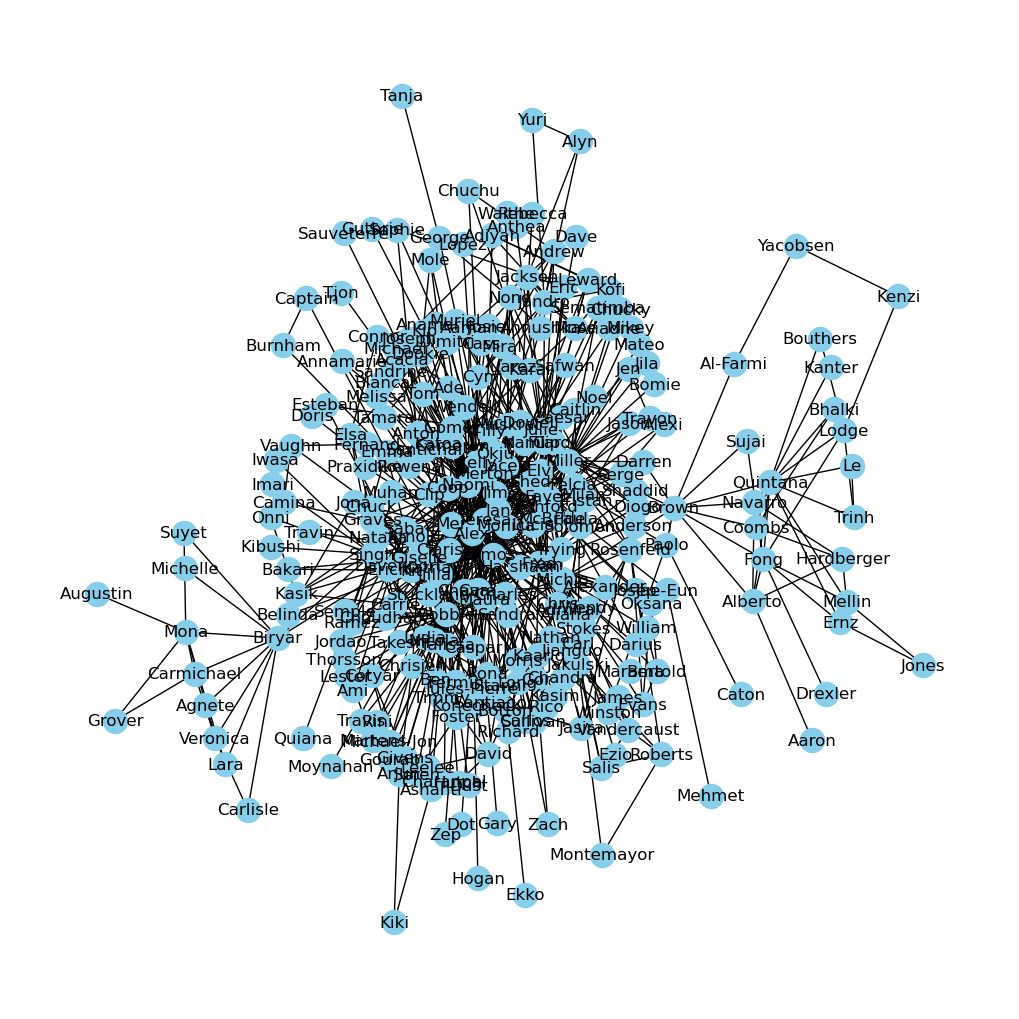

In [71]:
plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color="skyblue", edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

### Visualize Relationship Graph with Pyvis
This makes an interactive graph as an html file, which I've uploaded separately.

In [72]:
from pyvis.network import Network

In [73]:
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources="remote")

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("Expanse.html")

### Project Inspiration and Code Source
This project was oringinally created by Thu Vu data analytics and adapted for use with my own data set. Watch the YouTube video where Thu Vu walks through the whole project here: https://www.youtube.com/watch?v=fAHkJ_Dhr50&t=1003s

The Expanse book series is written by James S.A. Corey, the pen name of authors Daniel Abraham and Ty Franck. This is my favorite book series by far! I chose this series for the project because I already own all the books. I will not be including the raw text files for the books as they are copywrighted. 